In [1]:
import numpy
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [2]:
def tanh(x):
    return (1.0 - numpy.exp(-2*x) / (1.0 + numpy.exp(-2*x)))

def tanh_derivative(x):
    return (1 + tanh(x)) * (1 - tanh(x))

In [103]:
class NeuralNetwork:
    # net_arch는 정수로 구성된 배열이고, 
    # 각 층의 레이어에 몇개의 뉴런으로 구성되어 있는지 의미한다. 
    # 즉, 네트워크 아키텍처이다. 
    def __init__(self, net_arch):
        self.activity = tanh
        self.activity_derivative = tanh_derivative
        self.layers = len(net_arch)
        self.steps_per_epoch = 1000
        self.arch = net_arch
        
        self.weights = []
        # 웨이트 값의 범위는 [-1,1]이다. 
        for layer in range(len(net_arch)-1): # 역자: self.layers -> len(net_arch) - 1

            w = 2*numpy.random.rand(net_arch[layer]+1, net_arch[layer+1])-1 
            self.weights.append(w)
            
    # 데이터는 가능한 모든 데이터는 불리언(boolean)의 짝이다. 
    # True나 False는 숫자 1이나 0으로 설명된다. 
    # 라벨은 각각의 입력된 짝들의 논리연산 'XOR'의 결과이다. 
    def fit(self, data, labels, learning_rate=0.1, epochs=100):
        # 바이어스 유닛을 입력 레이어에 추가한다. 
        ones = numpy.ones((1, data.shape[0]))        
        Z = numpy.concatenate((ones.T, data), axis=1)
        training = epochs*self.steps_per_epoch
        
        for k in range(training):
            if k % self.steps_per_epoch == 0:
                print ('epochs: {}'.format(k/self.steps_per_epoch))
                for s in data: 
                    print (s, nn.predict(s))
                sample = numpy.random.randint(data.shape[0])
                y = [Z[sample]]
                for i in range(len(self.weights)-1):
                    activation = numpy.dot(y[i], self.weights[i])                         
                    activity = self.activity(activation)  
                    # 다음레이어에 바이어스를 추가한다. 
                    activity = numpy.concatenate((numpy.ones(1), numpy.array(activity)))
                    y.append(activity)
                        
                # 마지막 레이어
                activation = numpy.dot(y[-1], self.weights[-1])
                activity = self.activity(activation)
                y.append(activity)
                    
                # 결과레이어의 에러
                error = labels[sample] - y[-1]
                delta_vec = [error * self.activity_derivative(y[-1])]
                    
                # 마지막 레이어 다음부터 
                # 다시, 역방향으로 반복한다. 
                for i in range(self.layers-2, 0, -1):
                    error = delta_vec[-1].dot(self.weights[i][1:].T)
                    error = error*self.activity_derivative(y[i][1:])
                    delta_vec.append(error)
                    
                # 자 그럼, 뒤에서 앞으로 갈 값을 설정해야한다. 
                delta_vec.reverse()
                    
                # 마지막으로 역전파 규칙을 활용해서
                # 웨이트들을 조정한다. 
                for i in range(len(self.weights)):
                    layer = y[i].reshape(1, nn.arch[i]+1)
                    
                    delta = delta_vec[i].reshape(1, nn.arch[i+1])
                    self.weights[i] += learning_rate*layer.T.dot(delta)
                    
    def predict(self, x): 
        val = numpy.concatenate((numpy.ones(1).T, numpy.array(x)))      
        for i in range(0, len(self.weights)):
            val = self.activity(numpy.dot(val, self.weights[i]))
            val = numpy.concatenate((numpy.ones(1).T, numpy.array(val)))
            
        return val[1]
    
    ### 시각화 부분 추가 
    def plot_decision_regions(self, X, y, points=200):
        markers = ('o', '^')
        colors = ('red', 'blue')
        cmap = ListedColormap(colors)
        # plot the decision surface
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        
        resolution = max(x1_max - x1_min, x2_max - x2_min)/float(points)
        #resolution = 0.01
     
        xx1, xx2 = numpy.meshgrid(numpy.arange(x1_min, x1_max, resolution), numpy.arange(x2_min, x2_max, resolution))
        input = numpy.array([xx1.ravel(), xx2.ravel()]).T 
        Z = numpy.empty(0)
        for i in range(input.shape[0]):
            val = nn.predict(numpy.array(input[i]))
            if val < 0.5: val = 0 
            if val >= 0.5: val = 1
            Z = numpy.append(Z, val)

        Z = Z.reshape(xx1.shape)
        
        plt.pcolormesh(xx1, xx2, Z, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
        # plot all samples

        classes = ["False", "True"]
        for idx, cl in enumerate(numpy.unique(y)):
            plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=1.0, c=cmap(idx), marker=markers[idx], s=80, label=classes[idx])
            
        plt.xlabel('x-axis')            
        plt.ylabel('y-axis')
        plt.legend(loc='upper left')
        plt.show()

epochs: 0.0
[0 0] 0.31634987228520156
[0 1] 0.38455314510086014
[1 0] 0.49960366414001517
[1 1] 0.5470092417007291
epochs: 1.0
[0 0] 0.3976285504258552
[0 1] 0.45821314308761485
[1 0] 0.5931639105741229
[1 1] 0.6295998489950659
epochs: 2.0
[0 0] 0.4829108612940431
[0 1] 0.5682742534555036
[1 0] 0.6557308872863831
[1 1] 0.7085623988515519
epochs: 3.0
[0 0] 0.5244382843252992
[0 1] 0.6034802797710745
[1 0] 0.6978968247405479
[1 1] 0.7431605048776352
epochs: 4.0
[0 0] 0.44187618393814293
[0 1] 0.5008320739159167
[1 0] 0.6133542773394662
[1 1] 0.6501017271524965
epochs: 5.0
[0 0] 0.3545932464926247
[0 1] 0.3851520247735474
[1 0] 0.5144258284823433
[1 1] 0.5329058292578089
epochs: 6.0
[0 0] 0.42970040296327827
[0 1] 0.45543786402015785
[1 0] 0.6015915173972463
[1 1] 0.6139581402813806
epochs: 7.0
[0 0] 0.35688002601702606
[0 1] 0.3869047737905513
[1 0] 0.5449304939172129
[1 1] 0.5596960328762193
epochs: 8.0
[0 0] 0.46057470343613466
[0 1] 0.5264071854872813
[1 0] 0.6244629454954621
[1 1] 0.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


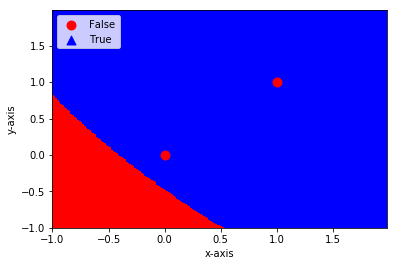

In [102]:
if __name__ == "__main__":
    numpy.random.seed(0)
    # 뉴럴 네트워크를 
    # 2개의 입력 뉴런
    # 2개의 히든 뉴런
    # 1개의 결과 뉴런 으로 초기화하자
    nn = NeuralNetwork([2,2,1])

    X = numpy.array([[0, 0],
                     [0, 1],
                     [1, 0],
                     [1, 1]])

    # 라벨을 설정하고, XOR 연산을 위한 올바른 결과값을 설정하자.
    y = numpy.array([0, 1, 1, 0])

    # fit 함수를 호출해서 뉴럴네트워크를 훈련시키자.
    # epoch의 갯수도 설정하자
    nn.fit(X, y, epochs=10)

    print ("최종 예측 결과")
    for s in X:
        print(s, nn.predict(s))
    
    nn.plot_decision_regions(X, y)